<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

Load the csv file and print the first five observations.

In [4]:
# type your code here
df= pd.read_csv("seeds_dataset.csv")
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0
1,12.13,13.73,5.394,3.745,5.220,0
2,14.86,14.67,5.678,3.258,5.351,0
3,15.69,14.75,5.527,3.514,5.046,0
4,19.94,16.92,6.675,3.763,6.550,1


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Consider the train-test split in the ratio 70:30 with random state = 1.

In [13]:
# type your code here
from sklearn.model_selection import train_test_split
x = df.drop("Type",axis = 1)
y = df["Type"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_preds = dc.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
s = confusion_matrix(y_preds,y_test)
print("The number of correctly redicted seeds:",s[0][0]+s[1][1])


The number of correctly redicted seeds: 59


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot a decision tree for the model in the previous question and identify the seed type of the first observation in the test set</b>
                </font>
            </div>
        </td>
    </tr>
</table>

1

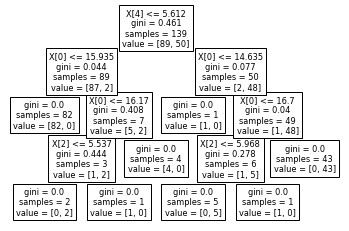

In [16]:
# type your code here
print(y_preds[0])
from sklearn.tree import plot_tree
plot_tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Select the optimal number for decision trees from the given list of values to build a random forest using entropy criterion
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

no_of_trees = [6, 8, 10, 12, 14, 16]

In [23]:
# type your code here
d = {"n_estimators" :[6, 8, 10, 12, 14, 16]}
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=14,criterion="entropy")
from sklearn.model_selection import GridSearchCV
gc = GridSearchCV(estimator= rc,param_grid=d)
gc.fit(x_train,y_train)
gc.best_params_
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[39,  0],
       [ 1, 20]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the most important variable in the random forest build with the optimal number of trees obtained in Q3
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

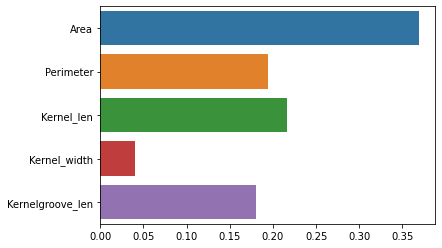

In [28]:
# type your code here
rc.feature_importances_
sns.barplot(y = x.columns,x = rc.feature_importances_)
# Area is the most important variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Which is the best criterion to build a decision tree for the given dataset?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
d = {"criterion":["gini","entropy"]}
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=14,criterion="entropy")
from sklearn.model_selection import GridSearchCV
gc = GridSearchCV(estimator=dc,param_grid=d)
gc.fit(x_train,y_train)
gc.best_params_

{'criterion': 'entropy'}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a random forest containing ten trees and compute the precision and sensitivity of the model from the confusion matrix 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
rc = RandomForestClassifier(n_estimators=10)
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
s = confusion_matrix(y_test,y_pred)
print(precision_score(y_test,y_pred))
print("sensitivity:",s[0][0]/(s[0][0]+s[1][0]))
s

1.0
sensitivity: 0.9736842105263158


array([[37,  0],
       [ 1, 22]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the optimal depth of the decision tree from the given list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth_values = [3, 5, 7, 9]

In [39]:
# type your code here
d = {"max_depth":[3,5,7,9]}
from sklearn.model_selection import GridSearchCV
gc = GridSearchCV(estimator=dc,param_grid=d)
gc.fit(x_train,y_train)
gc.best_params_

{'max_depth': 3}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build and plot a decision tree with maximum 5 terminal nodes (use the entropy criterion)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

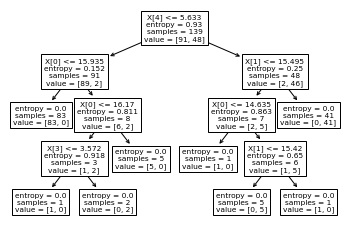

In [49]:
# type your code here
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy")
dc.fit(x_train,y_train)
y_preds = dc.predict(x_test)
from sklearn.tree import plot_tree
plot_tree(dc,max_depth = 5);

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a random forest with entropy criterion such that each leaf node will contain at least three samples. Also calculate the f-1 score and accuracy of the model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
rc = RandomForestClassifier(n_estimators=10,criterion="entropy",min_samples_leaf=3)
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9666666666666667
1.0
0.9444444444444444


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Plot a decision tree with the optimal criterion such that it will contain no more than 4 terminal nodes and each terminal node will contain at least 5 observations  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

{'max_depth': 3}


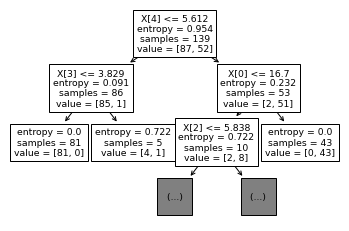

In [56]:
# type your code here
gc = GridSearchCV(estimator=dc,param_grid=d)
gc.fit(x_train,y_train)
print(gc.best_params_)

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=5)
dc.fit(x_train,y_train)
y_preds = dc.predict(x_test)
from sklearn.tree import plot_tree
plot_tree(dc,max_depth = 2);